In [3]:
import matplotlib.pyplot as plt
import cv2

In [4]:
# cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
posi4 = cv2.imread('concsurf/train/Positive/00004.jpg')
# cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
posi4 = cv2.cvtColor(posi4,cv2.COLOR_BGR2RGB)

In [5]:
type(posi4)

numpy.ndarray

In [6]:
posi4.shape

(227, 227, 3)

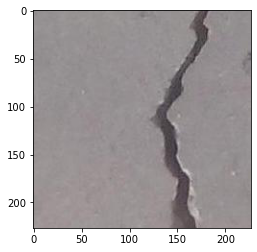

In [7]:
plt.imshow(posi4)

In [8]:
nega2 = cv2.imread('concsurf/train/Negative/00002.jpg')
nega2 = cv2.cvtColor(nega2,cv2.COLOR_BGR2RGB)

In [9]:
nega2.shape

(227, 227, 3)

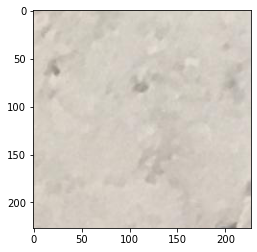

In [10]:
plt.imshow(nega2)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

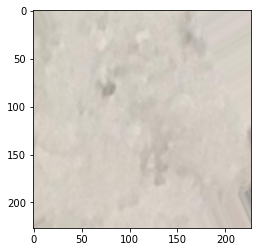

In [13]:
plt.imshow(image_gen.random_transform(nega2))

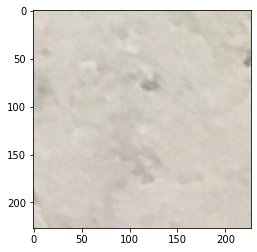

In [14]:
plt.imshow(image_gen.random_transform(nega2))

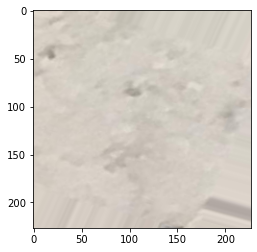

In [15]:
plt.imshow(image_gen.random_transform(nega2))

In [16]:
image_gen.flow_from_directory('concsurf/train') 

Found 16000 images belonging to 2 classes.


In [17]:
image_gen.flow_from_directory('concsurf/test')

Found 24000 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [18]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [19]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

### Training the Model

In [22]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('concsurf/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 16000 images belonging to 2 classes.


In [23]:
test_image_gen = image_gen.flow_from_directory('concsurf/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24000 images belonging to 2 classes.


In [24]:
train_image_gen.class_indices

{'Negative': 0, 'Positive': 1}

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
results = model.fit_generator(train_image_gen,epochs=5,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/5
150/150 [==============================] - 88s 585ms/step - loss: 0.2747 - accuracy: 0.9179 - val_loss: 0.2707 - val_accuracy: 0.9896
Epoch 2/5
150/150 [==============================] - 84s 560ms/step - loss: 0.1764 - accuracy: 0.9525 - val_loss: 0.1573 - val_accuracy: 0.9844
Epoch 3/5
150/150 [==============================] - 88s 588ms/step - loss: 0.1064 - accuracy: 0.9704 - val_loss: 0.0168 - val_accuracy: 0.9948
Epoch 4/5
150/150 [==============================] - 92s 613ms/step - loss: 0.0584 - accuracy: 0.9837 - val_loss: 0.1335 - val_accuracy: 0.9688
Epoch 5/5
150/150 [==============================] - 90s 598ms/step - loss: 0.0699 - accuracy: 0.9829 - val_loss: 0.0079 - val_accuracy: 1.0000


In [28]:
model.save('concsurfdeeplearning.h5')

# Evaluating the Model

In [31]:
results.history['accuracy']

[0.9179166555404663,
 0.9524999856948853,
 0.9704166650772095,
 0.9837499856948853,
 0.9829166531562805]

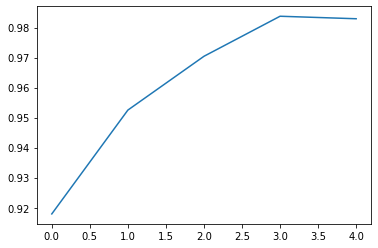

In [32]:
plt.plot(results.history['accuracy'])

In [33]:
model.save('concsurfdeeplearning_5epochs.h5')

# Predicting on new images

In [34]:
train_image_gen.class_indices

{'Negative': 0, 'Positive': 1}

In [39]:
import numpy as np
from keras.preprocessing import image

posi_file = 'concsurf/train/Positive/00002.jpg'
# dog_file = 'CATS_DOGS/train/Dog/2.jpg'

posi_img = image.load_img(posi_file, target_size=(150, 150))

posi_img = image.img_to_array(posi_img)

posi_img = np.expand_dims(posi_img, axis=0)
posi_img = posi_img/255

In [42]:
prediction_prob = model.predict(posi_img)

In [44]:
# Output prediction
print(f'Probability that image is a positive is: {prediction_prob} ')

Probability that image is a positive is: [[0.993462]] 


In [45]:
from keras.models import load_model

In [46]:
new_model=load_model('concsurfdeeplearning_5epochs.h5')

In [48]:
crack_file='concsurf/test/Positive/08005.jpg'

In [49]:
from keras.preprocessing import image

In [52]:
crack_img=image.load_img(crack_file,target_size=(150,150))

In [53]:
crack_img=image.img_to_array(crack_img)

In [54]:
crack_img.shape

(150, 150, 3)

In [55]:
import numpy as np
crack_img=np.expand_dims(crack_img,axis=0)

In [56]:
crack_img.shape

(1, 150, 150, 3)

In [58]:
model.predict_classes(crack_img)

array([[1]])

In [59]:
model.predict(crack_img)

array([[1.]], dtype=float32)